# Face Mask Detection

#### In this program we are using Keras and OpenCV and Neural Networks to Detect if a Person is wearing a Face Mask or Not Live through the Webcam

In [1]:
images = []
labels = []

In [2]:
import os

## Getting the Data

#### I have taken the data from Kaggle Face Mask Detection Dataset (3725 with_mask and 3828 without_mask)
##### Link : https://www.kaggle.com/omkargurav/face-mask-dataset

In [3]:
os.listdir('data')

['.DS_Store', 'with_mask', 'without_mask']

In [4]:
import cv2

In [5]:
for i in ['without_mask', 'with_mask']:
    imageNameList = os.listdir('data/' + str(i))
    for filename in imageNameList:
        Image = cv2.imread('data/' + str(i) + "/" + str(filename))
        try:
            gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
            Image = cv2.resize(gray, (100, 100))
            images.append(Image)
            if i == "without_mask":
                labels.append(0)
            else:
                labels.append(1)
        except:
            pass
    print("Inside folder", i)

Inside folder without_mask
Inside folder with_mask


## Converting it into Numpy Array

In [6]:
import numpy as np

In [7]:
images = np.array(images)
labels = np.array(labels)

In [8]:
type(images)

numpy.ndarray

In [9]:
type(labels)

numpy.ndarray

In [10]:
images.shape

(7553, 100, 100)

In [11]:
labels.shape

(7553,)

## Spliting the Data into Train and Test Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_features, test_features, train_target, test_target = train_test_split(images, labels, test_size=0.2)

In [14]:
train_features.shape

(6042, 100, 100)

In [15]:
train_target.shape

(6042,)

In [16]:
test_features.shape

(1511, 100, 100)

In [17]:
# Making a function to divided each image by 255 (color range)
def preprocessing(img):
    img = img/255
    return img

In [18]:
train_features = np.array(list(map(preprocessing, train_features)))

In [19]:
train_features.shape

(6042, 100, 100)

In [20]:
# Reshaping the train features for the model
train_features = train_features.reshape(train_features.shape[0], train_features.shape[1], train_features.shape[2], 1)

In [21]:
train_features.shape

(6042, 100, 100, 1)

In [22]:
test_features = np.array(list(map(preprocessing, test_features)))

In [23]:
test_features.shape

(1511, 100, 100)

In [24]:
# Reshaping the test features for the model
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], test_features.shape[2], 1)

In [25]:
test_features.shape

(1511, 100, 100, 1)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
dataGenerator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)

In [28]:
dataGenerator.fit(train_features)

In [29]:
batches = dataGenerator.flow(train_features, train_target, batch_size=20)

In [30]:
batches

In [31]:
X_batch, y_batch = next(batches)

## Plotting few of the Processed Images from Data

In [32]:
import matplotlib.pyplot as plt

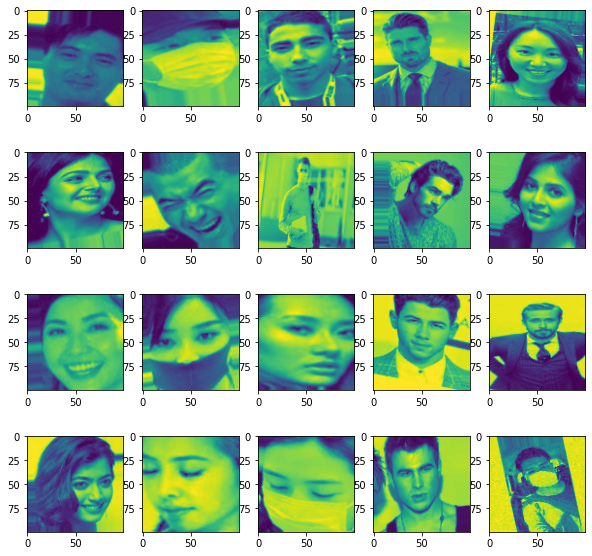

In [33]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_batch[i].reshape(100, 100))
plt.show()

In [34]:
train_target.shape

(6042,)

In [35]:
from keras.utils import to_categorical

In [36]:
train_target = to_categorical(train_target)

In [37]:
train_target.shape

(6042, 2)

## Making the Model

In [38]:
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout

In [39]:
model = Sequential()
model.add(Conv2D(100, (5, 5), activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(60, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(60, (5, 5), activation='relu'))
model.add(Conv2D(30, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(2, activation='softmax'))

## Compile the Model

In [40]:
from keras.optimizers import Adam

In [41]:
model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

## Fit the Model

In [42]:
model.fit_generator(dataGenerator.flow(train_features, train_target, batch_size=40), epochs=10)

/Users/Developer/Documents/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
152/152 [==============================] - 779s 5s/step - loss: 0.7227 - accuracy: 0.5147
Epoch 2/10
152/152 [==============================] - 777s 5s/step - loss: 0.6617 - accuracy: 0.6046
Epoch 3/10
152/152 [==============================] - 872s 6s/step - loss: 0.6232 - accuracy: 0.6473
Epoch 4/10
152/152 [==============================] - 779s 5s/step - loss: 0.5921 - accuracy: 0.6771
Epoch 5/10
152/152 [==============================] - 783s 5s/step - loss: 0.5132 - accuracy: 0.7432
Epoch 6/10
152/152 [==============================] - 787s 5s/step - loss: 0.4542 - accuracy: 0.7911
Epoch 7/10
152/152 [==============================] - 806s 5s/step - loss: 0.4119 - accuracy: 0.8106
Epoch 8/10
152/152 [==============================] - 790s 5s/step - loss: 0.3960 - accuracy: 0.8185
Epoch 9/10
152/152 [==============================] - 779s 5s/step - loss: 0.3836 - accuracy: 0.8354
Epoch 10/10
152/152 [==============================] - 912s 6s/step - loss: 0.3439 - accura

## Detects the Face Mask Live Through The Web Cam

In [43]:
labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(3,100,100,1))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()